## House Price Prediction

## Import Libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Loading & Exploration

In [275]:
# Load Dataset
df = pd.read_csv(r'Housing.csv')

In [277]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [279]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [281]:
# Shape of Data
df.shape

(545, 13)

In [283]:
# Info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [285]:
# Null Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [287]:
# statistical view of Numerical Data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [289]:
# statistical view of Categorocal Data
df.describe(include = 'object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [291]:
# Unique Values
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [293]:
# Duplicate Values
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

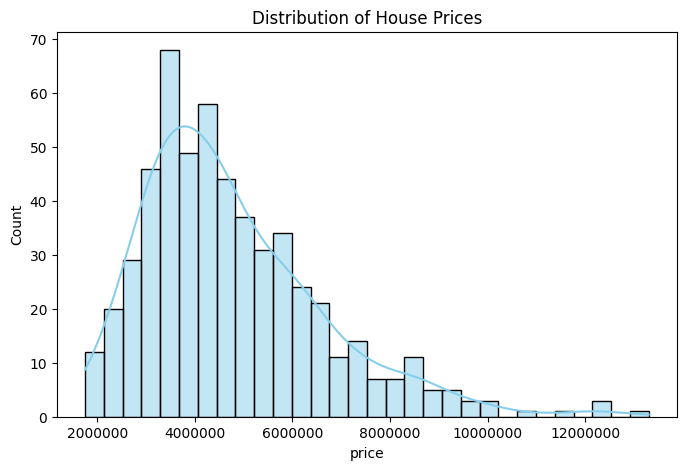

In [296]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of House Prices")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

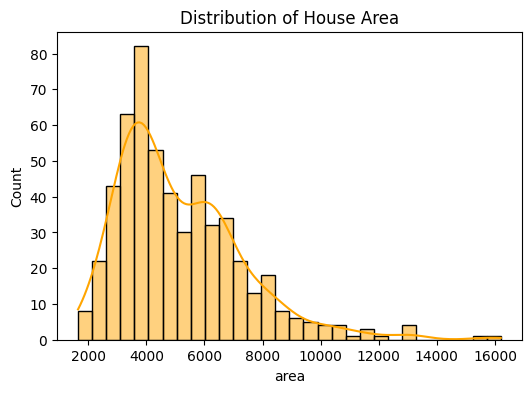

In [297]:
# Area distribution
plt.figure(figsize=(6,4))
sns.histplot(df['area'], bins=30, kde=True, color="orange")
plt.title("Distribution of House Area")
plt.show()

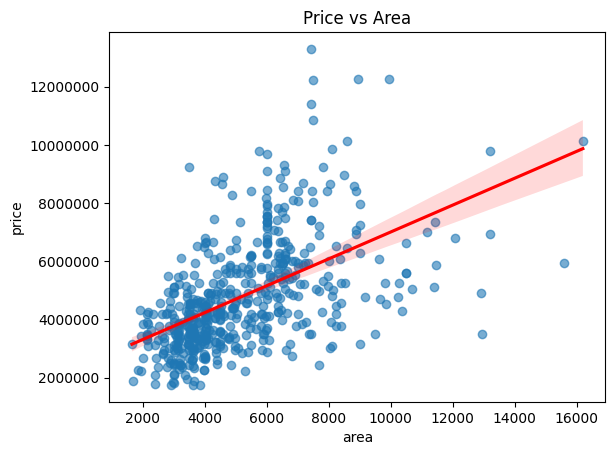

In [300]:
# Price vs Area (Regression plot)
sns.regplot(x="area", y="price", data=df, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("Price vs Area")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

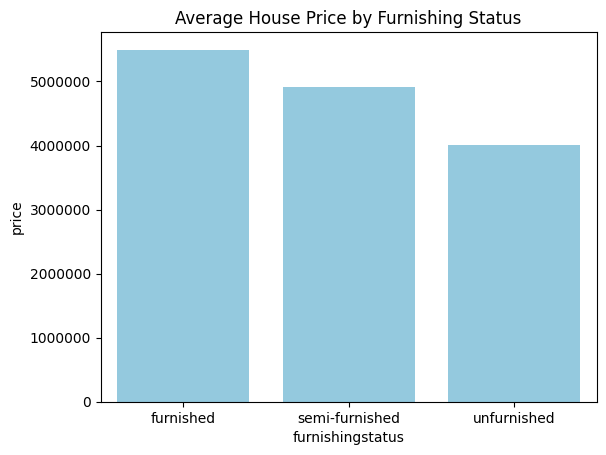

In [302]:
# Average Price vs Furnishing Status
sns.barplot(x="furnishingstatus", y="price", data=df, estimator=np.mean, errorbar=None, color="skyblue")
plt.title("Average House Price by Furnishing Status")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

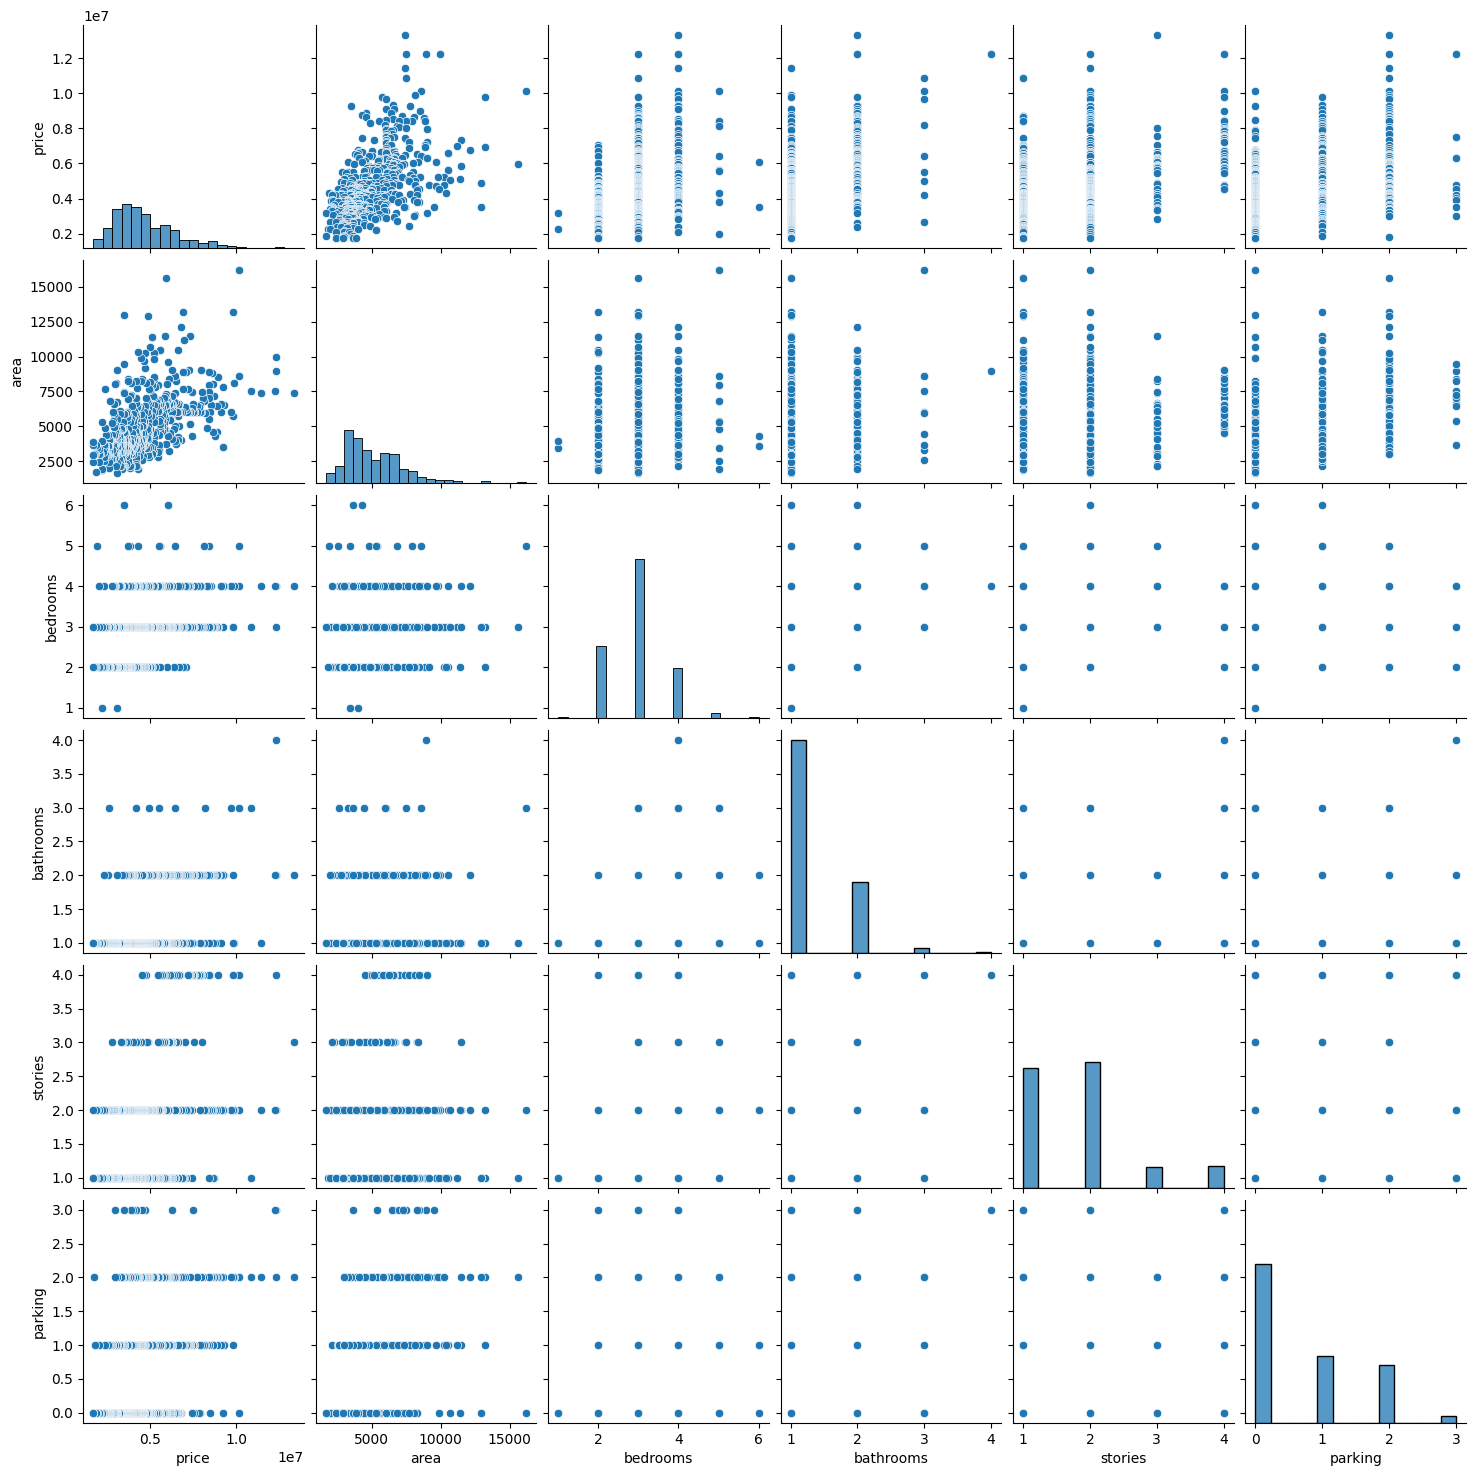

In [304]:
# Pairplot of Numerical Columns
sns.pairplot(df[["price","area","bedrooms","bathrooms","stories","parking"]])
plt.show()

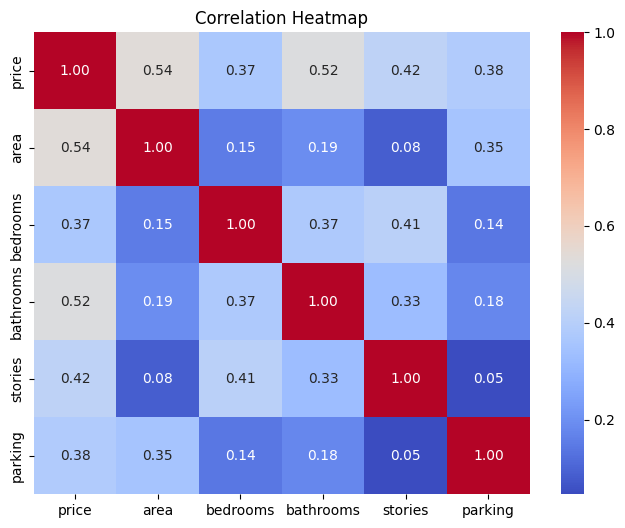

In [305]:
# Correlation heatmap

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Outliers Detection

In [307]:
# Outlier detection using IQR for (Price & Area)
cols = ["price", "area"]

for col in cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile Range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n Column: {col}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Total Outliers in {col}: {outliers.shape[0]}")
    print(outliers[[col]].head()) 


 Column: price
Lower Bound: -35000.0, Upper Bound: 9205000.0
Total Outliers in price: 15
      price
0  13300000
1  12250000
2  12250000
3  12215000
4  11410000

 Column: area
Lower Bound: -540.0, Upper Bound: 10500.0
Total Outliers in area: 12
     area
7   16200
10  13200
56  11440
64  11175
66  13200


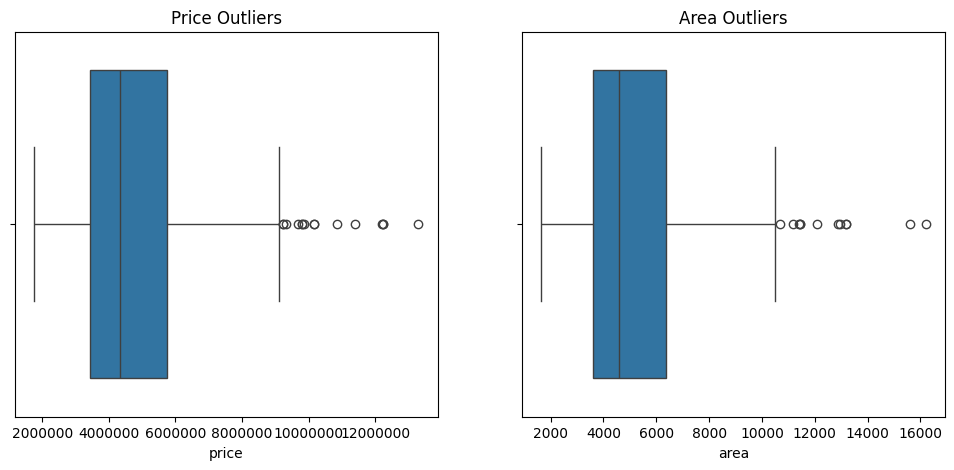

In [308]:
# Outliers Visualization
plt.figure(figsize=(12,5))

# Price boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.ticklabel_format(style='plain', axis='x')

# Area boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df["area"])
plt.title("Area Outliers")

plt.show()

In [309]:
# Outlier Capping
for col in ["price", "area"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

## Feature Engineering

In [316]:
# Label Encoding for binary categorical columns
binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [318]:
# One Hot Encoding for multi-category columns

df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)
df = df.astype(int) 

In [320]:
# Check encoded dataset
print(df.head())

     price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  9205000  7420         4          2        3         1          0         0   
1  9205000  8960         4          4        4         1          0         0   
2  9205000  9960         3          2        2         1          0         1   
3  9205000  7500         4          2        2         1          0         1   
4  9205000  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  \
0                0                1        2         1   
1                0                1        3         0   
2                0                0        2         1   
3                0                1        3         1   
4                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                             

## Feature & Target Split

In [323]:
X = df.drop("price", axis=1)
y = df["price"]

In [325]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [328]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [331]:
# Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [333]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 881928.61
Mean Squared Error (MSE): 1292078952546.47
Root Mean Squared Error (RMSE): 1136696.51
R-squared (R²): 0.68


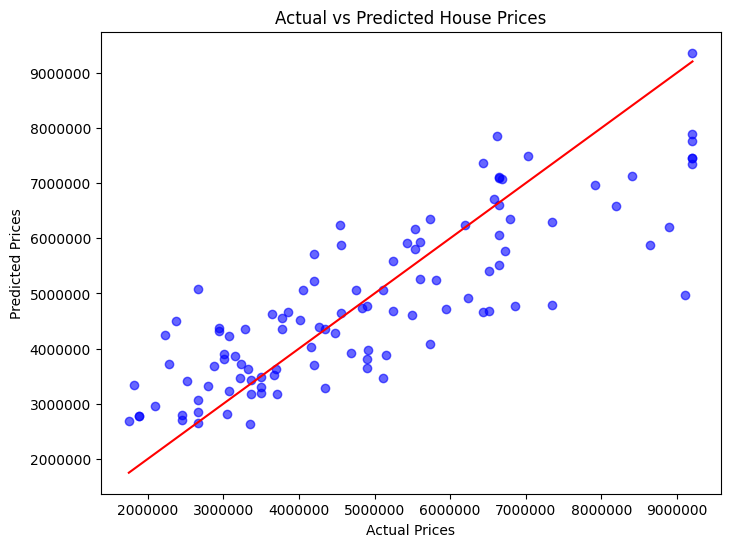

In [335]:
# Actual Price vs Predicted Price
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")  # ideal line
plt.show()

## Thank You !!